# Predicting the Sales Price of Bulldozers using ML Model

#### The goal of this project would be to predict the sales price of bulldozers using multiple `Regression` models.

## 1. Problem Definition
> Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers based on the previous datasets and for how much similar bulldozers have been sold for?
## 2. Data
> The data is downloaded from Kaggle Bluebook for Bulldozers competition.
There are 3 main datasets. https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this     set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1,     2012 - November 2012. Your score on the test set determines your final rank for the competition.
## 3. Evaluation
> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

	**Note:** The goal for most of the `Regression` model is to minimize the error. 
## 4. Features
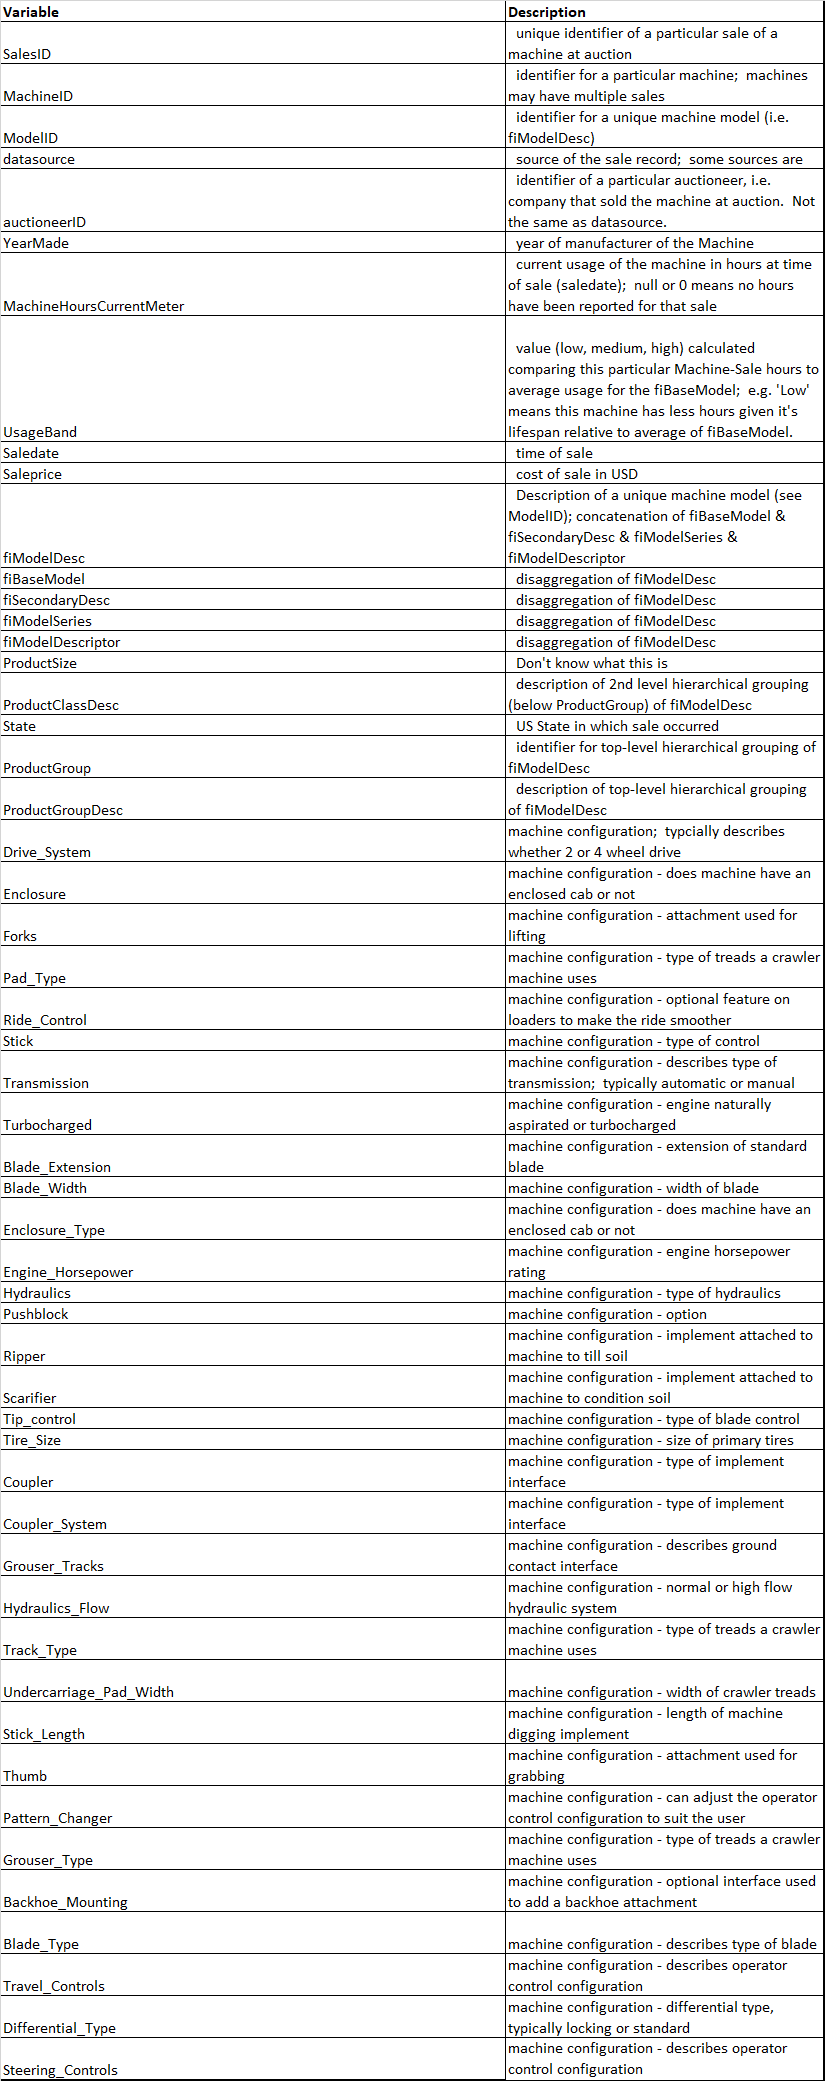

# Importing all the Libraries that we need

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from pandas_profiling import ProfileReport
%matplotlib inline

In [5]:
# Importing taining and validation data
df = pd.read_csv('./datasets/TrainAndValid.csv', low_memory=False)

# Creating EDA Report using Pandas Profiling
> Check EDA_Report.html file for Complete EDA Reports

In [9]:
profile = ProfileReport(df)
profile.to_file(output_file=('EDA_Report.html'))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\bhaga\Desktop\Sample_Project\env\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
C:\Users\bhaga\Desktop\Sample_Project\env\lib\site-packages\pandas_profiling\model\correlations.py:67: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Checking SalesPrice according to SalesDate
> Withot Parsing Saledate column

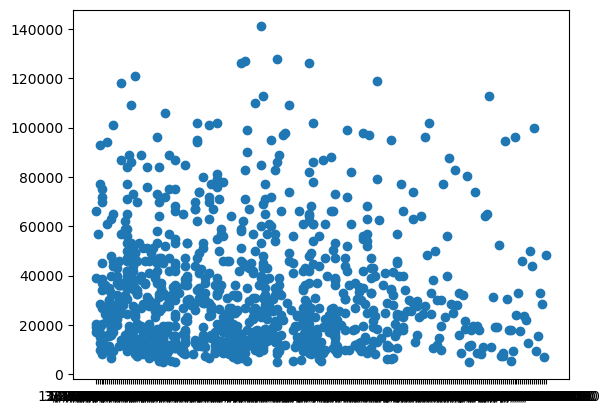

In [13]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

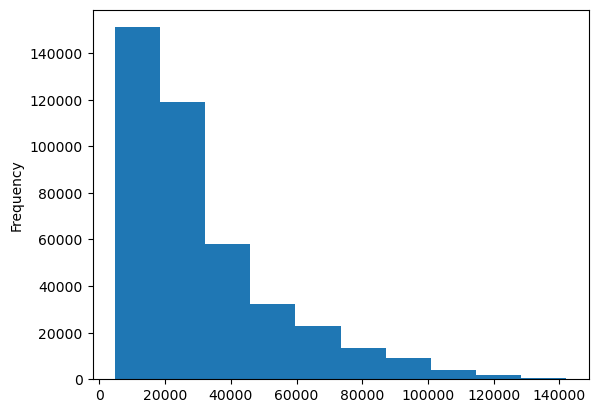

In [15]:
df.SalePrice.plot.hist();

## Parsing Dates

* While working with Time Serie Data, we want to enrich the time and date component as much as possible.
* We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.
## Importing data again with Parsed date this time

In [16]:
df = pd.read_csv('./datasets/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

# Checking SalesPrice according to SalesDate
> After the SaleDate is parsed

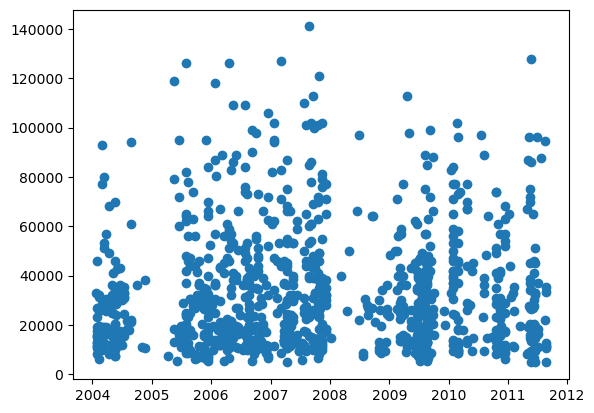

In [17]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

# Sort DataFrame by SaleDate
> When working with TimeSeriesData, it's a good idea to sort it by date.

In [24]:
#Sorting datafreame by saledate
df.sort_values(by=["saledate"], inplace=True)
df.saledate.head(20)

205615   1989-01-17
67974    1989-01-31
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Making a copy of original DataFrame

In [25]:
#Making a copy of df
df_tmp = df.copy()

In [27]:
df_tmp.saledate.head(10)

205615   1989-01-17
67974    1989-01-31
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
Name: saledate, dtype: datetime64[ns]

# Add datetime parameters for `saledate` column

In [35]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofYear"] = df_tmp.saledate.dt.dayofyear
df_tmp.head().T

,205615,67974,274835,141296,212552
SalesID,1646770,1344379,1821514,1505138,1671174
SalePrice,9500.0,70000.0,14000.0,50000.0,16000.0
MachineID,1126363,1374638,1194089,1473654,1327630
ModelID,8434,3819,10150,4139,8591
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1982,1980,1978,1980
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


## Removing the `saledate` column as we have enriched our DF with dateTime features

In [37]:
df_tmp.drop('saledate', axis=1, inplace=True)

In [39]:
df_tmp.head().T

,205615,67974,274835,141296,212552
SalesID,1646770,1344379,1821514,1505138,1671174
SalePrice,9500.0,70000.0,14000.0,50000.0,16000.0
MachineID,1126363,1374638,1194089,1473654,1327630
ModelID,8434,3819,10150,4139,8591
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1982,1980,1978,1980
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,950B,A66,D7G,A62


# Checking the values of different columns

In [40]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [41]:
df_tmp.fiProductClassDesc.value_counts()

Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth             57542
Track Type Tractor, Dozer - 20.0 to 75.0 Horsepower                 18131
Wheel Loader - 150.0 to 175.0 Horsepower                            15537
Track Type Tractor, Dozer - 85.0 to 105.0 Horsepower                15161
Hydraulic Excavator, Track - 21.0 to 24.0 Metric Tons               13736
                                                                    ...  
Hydraulic Excavator, Track - Unidentified (Compact Construction)       38
Wheel Loader - 1000.0 + Horsepower                                     25
Hydraulic Excavator, Track - 150.0 to 300.0 Metric Tons                21
Hydraulic Excavator, Track - 300.0 + Metric Tons                        1
Motorgrader - Unidentified                                              1
Name: fiProductClassDesc, Length: 74, dtype: int64

# Convert strings to categories Using `Pandas`

In [45]:
#Verifying which columns are strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [46]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]= content.astype("category").cat.as_ordered()

In [48]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [51]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [53]:
df_tmp.state.cat.codes

205615    43
67974      8
274835     8
141296     8
212552     8
          ..
411927     4
409783     4
409202     4
411649     4
409203     4
Length: 412698, dtype: int8

## Saving Preproccessed data into new file

In [54]:
df_tmp.to_csv("./datasets/train_tmp.csv", index=False)

## Importing Preprocessed data

In [57]:
df_tmp = pd.read_csv("./datasets/train_tmp.csv", low_memory=False)
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

# Filling the missing values
## 1. Filling numerical values first

In [58]:
# This will give all the numeric data types
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [59]:
df_tmp.ModelID

0          8434
1          3819
2         10150
3          4139
4          8591
          ...  
412693    17244
412694     4605
412695     4701
412696     9579
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [66]:
#Checking which numeric column have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [67]:
# Filling numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Adding a binary column which tells us if the data was missing
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            #Filling missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [69]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
1,1344379,70000.0,1374638,3819,132,99.0,1982,0.0,NaN,950B,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
2,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
3,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
4,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True


# Verifying if there is still any null numerical columns

In [76]:
#Checking which numeric column have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
        else:
        	print("No Numerical Column with null value.")

No Numerical Column with null value.
No Numerical Column with null value.
No Numerical Column with null value.
No Numerical Column with null value.
No Numerical Column with null value.
No Numerical Column with null value.
No Numerical Column with null value.
No Numerical Column with null value.
No Numerical Column with null value.
No Numerical Column with null value.
No Numerical Column with null value.
No Numerical Column with null value.
No Numerical Column with null value.
No Numerical Column with null value.
No Numerical Column with null value.


# Checking how many examples were missing

In [79]:
df_tmp.auctioneerID_is_missing.value_counts(), df_tmp.MachineHoursCurrentMeter_is_missing.value_counts()

(False    392562
 True      20136
 Name: auctioneerID_is_missing, dtype: int64,
 True     265194
 False    147504
 Name: MachineHoursCurrentMeter_is_missing, dtype: int64)

## 2. Filling categorical values

In [80]:
# This will give all the categorical data types
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [84]:
# Turn categorical variables into numbers & fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add binary column to indicate if sample had missing values
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        #Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [83]:
pd.Categorical(df_tmp["state"]).codes +1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [85]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [86]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1344379,1821514,1505138,1671174
SalePrice,9500.0,70000.0,14000.0,50000.0,16000.0
MachineID,1126363,1374638,1194089,1473654,1327630
ModelID,8434,3819,10150,4139,8591
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,True,False,True
Blade_Type_is_missing,False,True,True,False,True
Travel_Controls_is_missing,False,True,True,False,True
Differential_Type_is_missing,True,False,False,True,False


In [91]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

# Modelling
> Now that all of our data is numeric and none of our column has any missing values, we're good to go with modelling step.

In [94]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1)

#Fitting  the mdoel
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: total: 35min 59s
Wall time: 4min 47s


RandomForestRegressor(n_jobs=-1)

In [95]:
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875732905592558

# Splitting data into train/Validation set

In [99]:
df_tmp.saleYear.value_counts().sort_index()

1989     4806
1990     4529
1991     5109
1992     5519
1993     6303
1994     7929
1995     8530
1996     8829
1997     9785
1998    13046
1999    12793
2000    17415
2001    17594
2002    17246
2003    15254
2004    19879
2005    20463
2006    21685
2007    32208
2008    39767
2009    43849
2010    33390
2011    35197
2012    11573
Name: saleYear, dtype: int64

In [100]:
#Splitting into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [123]:
#Splitting data into X and y 
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val["SalePrice"]

## Building an evaluation function

In [124]:
#Creating evaluation function (This competition used RMSLE as evaluation)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error betwween predcitions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

#Creating function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE" : mean_absolute_error(y_train, train_preds),
             "Valid MAE" : mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "VALID RMSLE": rmsle(y_valid, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## Testing our model on subset (To tune hyperparameters & reduce execution time)

In [125]:
#Change max_samples values to reduce exec. time
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=12000)

In [126]:
%%time
model.fit(X_train, y_train)

CPU times: total: 1min 21s
Wall time: 11.1 s


RandomForestRegressor(max_samples=12000, n_jobs=-1, random_state=42)

In [127]:
show_scores(model)

{'Training MAE': 5417.293632982238,
 'Valid MAE': 7007.433833059708,
 'Training RMSLE': 0.25192305805853416,
 'VALID RMSLE': 0.28725437446512236,
 'Training R^2': 0.8672734391260353,
 'Valid R^2': 0.8380034222521839}

In [150]:
%%time
#Different hyperparameters for RandomForestREGRESSOR
rf_grid = {"n_estimators" : np.arange(10, 100, 10),
          "max_depth" : [None, 3, 5, 10],
          "min_samples_split" : np.arange(2, 20,2),
          "min_samples_leaf" : np.arange(1, 20, 2),
          "max_features" : [0.5, 1, "sqrt", "auto"],
          "max_samples" : [10000]}

#Instantiate RandomizedSeachCV
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions=rf_grid,
                             n_iter=10,
                             cv=5)
#Fitting the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

C:\Users\bhaga\Desktop\Sample_Project\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\bhaga\Desktop\Sample_Project\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\bhaga\Desktop\Sample_Project\env\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

CPU times: total: 1min 12s
Wall time: 2min 7s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [151]:
#Finding the best parameters in a short time using only 2 iter
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [152]:
show_scores(rs_model)

{'Training MAE': 6069.956431362398,
 'Valid MAE': 7630.474842859632,
 'Training RMSLE': 0.2763754137870765,
 'VALID RMSLE': 0.30768047600139065,
 'Training R^2': 0.8325929362703773,
 'Valid R^2': 0.8024058958425545}

## Ideal Parametes found from 100 iterations of RandomizedSearchCV

In [153]:
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   random_state=42,
                                   n_jobs=-1,
                                   max_samples=None)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [155]:
#Scores on rs_model trained only on 10000 examples
show_scores(rs_model)

{'Training MAE': 6069.956431362398,
 'Valid MAE': 7630.474842859632,
 'Training RMSLE': 0.2763754137870765,
 'VALID RMSLE': 0.30768047600139065,
 'Training R^2': 0.8325929362703774,
 'Valid R^2': 0.8024058958425545}

In [156]:
#Scores on ideal_model trained on all data
show_scores(ideal_model)

{'Training MAE': 2947.271637119661,
 'Valid MAE': 5940.1545246684345,
 'Training RMSLE': 0.14430447492514376,
 'VALID RMSLE': 0.24546228232925307,
 'Training R^2': 0.9590980460124525,
 'Valid R^2': 0.881856539953488}

# Making prediction on Test Data

In [166]:
df_test = pd.read_csv('./datasets/Test.csv', low_memory=False, parse_dates=["saledate"])

In [167]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


# Preprocessing Test dataset
## Getting test data in the same format as the training data

In [168]:
def preprocess_data(df):
    """
    Performs transformation on df & returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofWeek"] = df.saledate.dt.dayofweek
    df["saleDayofYear"] = df.saledate.dt.dayofyear
    
    #Dropping the saledate now as we don't need it.
    df.drop('saledate', axis=1, inplace=True)
    
    #Fill numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Adding a binary column which tells us if the data was missing
                df[label+"_is_missing"] = pd.isnull(content)
                #Filling missing numeric values with median
                df[label] = content.fillna(content.median())
    
    #Fill categorical missing data & turn those  data into numbers
        if not pd.api.types.is_numeric_dtype(content):
            #Add binary column to indicate if sample had missing values
            df[label+"_is_missing"] = pd.isnull(content)
            #Turn categories into numbers and add +1
            df[label] = pd.Categorical(content).codes + 1
    
    return df

In [169]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


## Finding the missing column using python `set`

In [171]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [172]:
# Manually adjusting df_test to have "auctioneerID_is_missing" column
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [184]:
X_train.T[51:71]

,0,1,2,3,4,5,6,7,8,9,...,401115,401116,401117,401118,401119,401120,401121,401122,401123,401124
saleYear,1989,1989,1989,1989,1989,1989,1989,1989,1989,1989,...,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
saleMonth,1,1,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
saleDay,17,31,31,31,31,31,31,31,31,31,...,30,30,30,30,30,30,30,30,30,30
saleDayofWeek,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
saleDayofYear,17,31,31,31,31,31,31,31,31,31,...,364,364,364,364,364,364,364,364,364,364
auctioneerID_is_missing,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
MachineHoursCurrentMeter_is_missing,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
UsageBand_is_missing,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
fiModelDesc_is_missing,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fiBaseModel_is_missing,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Changing the position of new column to match it's position with the training set

In [215]:
#Copying the df_test as a copy
df_test_copy = df_test
df_test_copy

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,True,True,True,True,True,False
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,True,True,True,True,True,False
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,True,True,True,True,True,False
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,True,True,True,True,True,False


In [205]:
col_to_move = df_test_copy.columns[101]
new_col_order = list(df_test_copy.columns)
new_col_order.remove(col_to_move)
new_col_order.insert(56, col_to_move)
df_test_new = df_test_copy.reindex(columns=new_col_order)
df_test_new.columns[56]

'auctioneerID_is_missing'

## Making prediction on test data

In [206]:
test_preds = ideal_model.predict(df_test_new)

In [209]:
test_preds

array([18106.89665979, 17882.77599708, 46235.85495811, ...,
       11975.75351334, 18208.86647381, 23901.22021305])

# Formatting our Final Prediction in the way Kaggle needs

In [211]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test_new["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,18106.896660
1,1227844,17882.775997
2,1227847,46235.854958
3,1227848,68569.897822
4,1227863,58251.477462
...,...,...
12452,6643171,38285.267944
12453,6643173,13172.944171
12454,6643184,11975.753513
12455,6643186,18208.866474


In [214]:
# Exporting Predicted Data
df_preds.to_csv("Final_Test_Predicted.csv")

# Feature Importance
> The attributes of the data that were most contributing towards the prediction of our Final result

In [229]:
#Finding Feaure Importance
feat_importance = ideal_model.feature_importances_
feat_importance

array([3.39369253e-02, 1.67578385e-02, 4.05269696e-02, 2.22276366e-03,
       3.34664349e-03, 2.06850471e-01, 3.15051292e-03, 9.64638432e-04,
       3.84329862e-02, 4.92150665e-02, 6.84654203e-02, 5.04396334e-03,
       1.46128784e-02, 1.56193086e-01, 4.87817129e-02, 5.93010577e-03,
       3.78416631e-03, 1.57046368e-03, 4.20440903e-03, 5.61141930e-02,
       9.03131301e-04, 3.98408243e-04, 8.21839928e-04, 1.97152916e-04,
       1.11255099e-03, 2.58234208e-05, 4.66202230e-05, 8.38887497e-03,
       3.04775554e-03, 1.12527057e-04, 6.36702057e-03, 1.78588090e-03,
       2.95884444e-03, 2.63342391e-03, 2.22576126e-03, 3.87969325e-03,
       7.50391320e-04, 1.80324452e-02, 3.72557587e-03, 4.91010894e-05,
       9.99969276e-04, 1.03619971e-03, 2.92757293e-03, 5.52677187e-04,
       3.63716578e-04, 3.88002096e-04, 4.89567311e-04, 2.15683787e-03,
       8.58812090e-04, 1.81714282e-04, 2.93892535e-04, 7.37547599e-02,
       3.76184231e-03, 5.63824640e-03, 2.87345517e-03, 9.89267763e-03,
      

In [223]:
len(ideal_model.feature_importances_), X_train.shape

(102, (401125, 102))

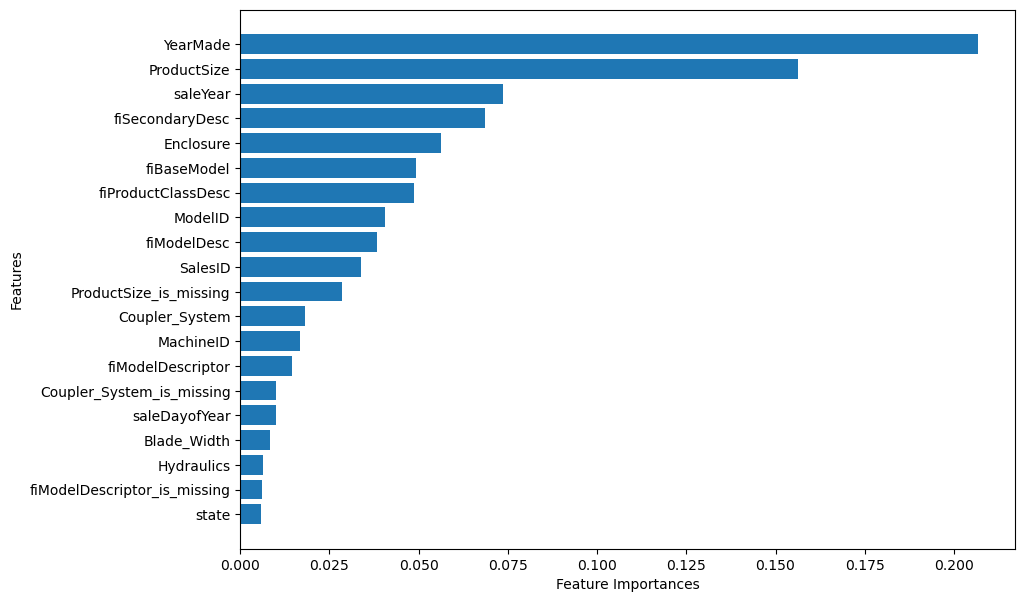

In [242]:
#Function for plotting feature imprtnace
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"feature": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    #Plot the dataframe
    fig, ax = plt.subplots(figsize=(10,7))
    ax.barh(df["feature"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importances")
    ax.invert_yaxis()
    
plot_features(X_train.columns, ideal_model.feature_importances_)

In [244]:
df['ProductSize'].value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64

In [246]:
df['YearMade'].value_counts().sort_index()

1000    39391
1919      127
1920       17
1937        1
1942        1
        ...  
2010       58
2011       31
2012        1
2013        1
2014        2
Name: YearMade, Length: 73, dtype: int64

In [249]:
df_tmp['saleYear'].value_counts().sort_index()

1989     4806
1990     4529
1991     5109
1992     5519
1993     6303
1994     7929
1995     8530
1996     8829
1997     9785
1998    13046
1999    12793
2000    17415
2001    17594
2002    17246
2003    15254
2004    19879
2005    20463
2006    21685
2007    32208
2008    39767
2009    43849
2010    33390
2011    35197
2012    11573
Name: saleYear, dtype: int64